In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
#importing the dataset
data = pd.read_csv('american_bankruptcy.csv')
data.head(10)

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
5,C_1,alive,2004,474.542,598.172,27.950,61.774,255.477,15.453,127.121,...,747.848,732.230,227.159,33.824,149.676,160.025,142.450,747.848,417.486,686.074
6,C_1,alive,2005,624.454,704.081,29.222,91.877,323.592,35.163,136.272,...,897.284,978.819,318.576,62.655,193.203,187.788,183.550,897.284,556.102,805.407
7,C_1,alive,2006,645.721,837.171,32.199,118.907,342.593,58.660,181.691,...,1061.169,1067.633,253.611,86.708,223.998,256.506,242.153,1061.169,573.390,942.262
8,C_1,alive,2007,783.431,1080.895,39.952,168.522,435.608,75.144,202.472,...,1384.919,1362.010,507.918,128.570,304.024,218.499,318.184,1384.919,776.755,1216.397
9,C_1,alive,2008,851.312,1110.677,40.551,166.080,477.424,78.651,227.300,...,1423.976,1377.511,392.984,125.529,313.299,254.418,385.851,1423.976,720.616,1257.896


In [33]:
print(data.isnull().sum())


company_name    0
status_label    0
year            0
X1              0
X2              0
X3              0
X4              0
X5              0
X6              0
X7              0
X8              0
X9              0
X10             0
X11             0
X12             0
X13             0
X14             0
X15             0
X16             0
X17             0
X18             0
dtype: int64


In [34]:
#basic EDA
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

In [35]:
#convert categorical data into numberical data
#here we change status_label alive:0 and distressed:1
data['status_label'] = data['status_label'].map({'alive':0,'failed': 1}) 
data = data.drop(columns=['company_name','year'])

In [36]:
#checking for null values
print(data.isnull().sum())


status_label    0
X1              0
X2              0
X3              0
X4              0
X5              0
X6              0
X7              0
X8              0
X9              0
X10             0
X11             0
X12             0
X13             0
X14             0
X15             0
X16             0
X17             0
X18             0
dtype: int64


In [37]:
#FEATURE SELECTION
#X-> FEATURES
#Y-> TARGET VARIABLE OR OUTPUT
X = data.drop(columns=['status_label'])
y = data['status_label']

In [38]:
#SPLITTING DATA INTO TRAINING AND TESTING
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
#TRAINING THE LOGISTIC REGRESSION MODEL
logres = LogisticRegression()
logres.fit(X_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
#PREDICTING 
y_pred = logres.predict(X_test)
y_proba = logres.predict_proba(X_test)[:, 1]

In [ ]:
#UNDERSTANDING WEIGHTAGE OF EACH FEATURE IN MODEL TRAINING 
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logres.coef_[0],
    'Odds Ratio': np.exp(logres.coef_[0])  # Odds ratio for interpretability
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

   Feature  Coefficient  Odds Ratio
4       X5     0.008755    1.008794
6       X7     0.004876    1.004888
2       X3     0.003401    1.003406
13     X14     0.001470    1.001471
16     X17     0.001450    1.001451
5       X6     0.001418    1.001419
3       X4     0.000951    1.000952
14     X15     0.000431    1.000431
8       X9     0.000129    1.000129
15     X16     0.000129    1.000129
12     X13     0.000093    1.000093
1       X2     0.000011    1.000011
10     X11    -0.000420    0.999580
9      X10    -0.000585    0.999415
17     X18    -0.000829    0.999172
7       X8    -0.001129    0.998871
11     X12    -0.002416    0.997587
0       X1    -0.007216    0.992810


In [48]:
#MODEL EVALUATION 
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy: 0.93
ROC-AUC Score: 0.60


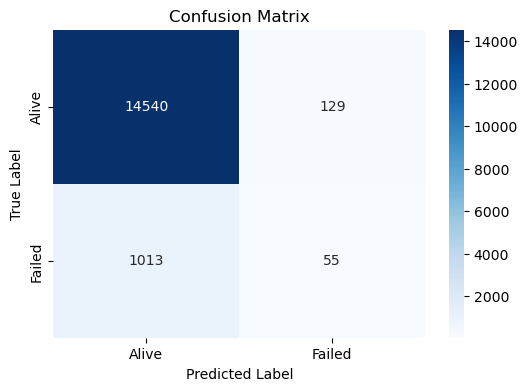

In [50]:
#VISUALIZATIONS
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Alive', 'Failed'], yticklabels=['Alive', 'Failed'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

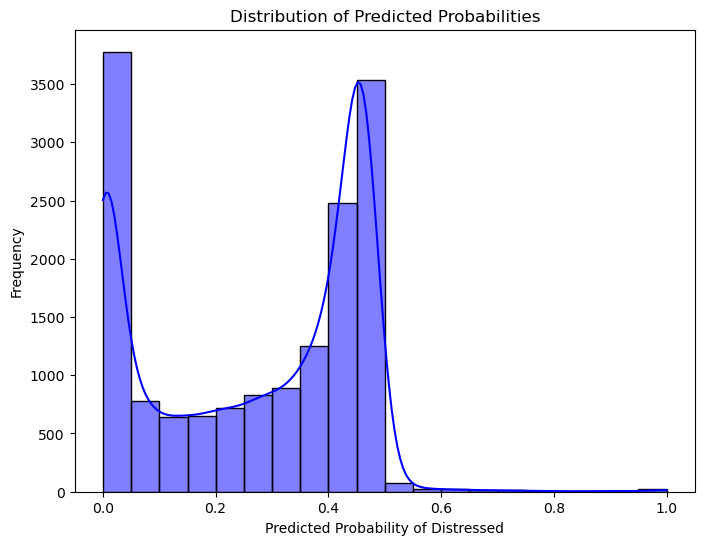

In [51]:
# Plot distribution of predicted probabilities for the positive class (distressed)
plt.figure(figsize=(8, 6))
sns.histplot(y_proba, bins=20, kde=True, color='blue')
plt.xlabel("Predicted Probability of Distressed")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities")
plt.show()
